## Reconstruction parcimonieuse


On s'intéresse au problème

$$(\mathcal{P})\quad \min_{x\in \mathbb{R}^n}f(x) = \frac{1}{2}\Vert H x-y \Vert_W^2+\lambda \Vert x \Vert_1 $$

avec $y\in \mathbb{R}^m$ une observation du signal à reconstruire, $H\in \mathcal{M}_{m,n}(\mathbb{R})$, $W\in \mathcal{M}_{m}(\mathbb{R})$ symétrique définie positive. La matrice $W$ introduit une pondération sur les composantes du résidu.

**Question 1 :** Justifier la convexité de la fonctionnelle et donner un sous-gradient.


La fonctionnelle $f$ est convexe comme somme et composition de fonctionnelles convexes.

Sous-gradient de f en x :

$$ g = H^{T}W \displaystyle\left(Hx - y\right) + \lambda \text{sign}(x) $$

Justification :

$$
\begin{align*}
\varphi(x) & = \cfrac{1}{2}\displaystyle\left(Hx - y\right)^{T}W\displaystyle\left(Hx - y\right) & \\
& = \cfrac{1}{2}\displaystyle\left(Hx - y\right)^{T}W^{\frac{1}{2}}W^{\frac{1}{2}}\displaystyle\left(Hx - y\right) & \text{on écrit } W = W^{\frac{1}{2}}W^{\frac{1}{2}} \text{ car } W \in S_{++}\\
& = \cfrac{1}{2}\displaystyle\left(Hx - y\right)^{T}\displaystyle\left(W^{\frac{1}{2}}\right)^{T}W^{\frac{1}{2}}\displaystyle\left(Hx - y\right) & \text{car } W^{\frac{1}{2}} \text{ est symétrique}\\
& = \displaystyle\lVert W^{\frac{1}{2}}\displaystyle\left(Hx - y\right) \rVert _{2}^2 \\
& = \displaystyle\lVert W^{\frac{1}{2}}Hx - W^{\frac{1}{2}}y \rVert _{2}^2
\end{align*}

$$

Le gradient d'une telle fonction est :

$$
\begin{align*}
\nabla \varphi (x) & = \displaystyle\left(W^{\frac{1}{2}}H\right)^{T} \displaystyle\left(W^{\frac{1}{2}}Hx - W^{\frac{1}{2}}y \right) \\
& = H^{T}W \displaystyle\left(Hx - y\right)
\end{align*}
$$

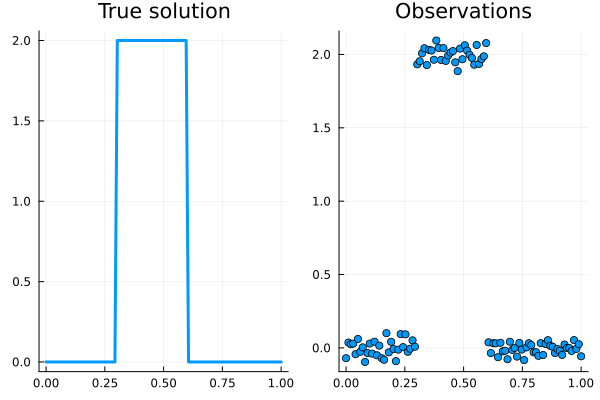

In [1]:
#Pkg.add("Plots")
using Plots

using LinearAlgebra

# Construction du problème #
############################

# solution à reconstruire 
##########################
dx=0.01;

n=Int(1/dx);#+1;
px=LinRange(0.,1.,n);
xt=zeros(n,1);

for i = 1:n
    if (px[i] > 0.3 && px[i]< 0.6)
        xt[i] = 2;         
    end
end


#observations
#############
nobs=1;
m=Int(floor(n/nobs));
var_obs=0.05;
sigmaW=ones(m,1)+2.0*rand(Float64,(m,1));

H=zeros(m,n);
py=zeros(m,1);
W=zeros(m,m);
for i=1:m
   H[i,(i-1)*nobs+1]=1;
   py[i]=px[(i-1)*nobs+1]; 
   W[i,i]=sigmaW[i];
end    
y=H*xt+var_obs*randn(Float64,(m,1));


p1=plot(px,xt,title="True solution",label=["xt"],lw=3);
p2=scatter(py,y,title="Observations",lw=3);
plot(p1,p2,layout=(1,2),legend=false)

**Question 2 :** Proposer le calcul de l'évaluation de f et d'un sous-gradient de f

In [2]:
# Fonction évaluant f en x
function evalf(x,y,H,W,lambda) 
    # Insérer votre code
    return (1/2)*transpose(H*x - y)*W*(H*x - y) .+ lambda*norm(x,1)
    # Fin insérer code
end

# Fonction évaluant un sous-gradient de f en x
function subgradf(x,y,H,W,lambda) 
    # Insérer votre code
    return transpose(H)*W*(H*x - y) + lambda*sign.(x)
    # Fin insérer code
end

subgradf (generic function with 1 method)

**Question 3 :** Résoudre le problème en utilisant un algorithme de sous-gradient. Vous implanterez les trois stratégies de pas vues en cours. Vous afficherez les courbes de convergence de $f_{best}^k$. 

**Question 4 :** Quelle influence a le paramètre $\lambda$ sur la convergence de l'algorithme et la qualité de la solution optimisée ?

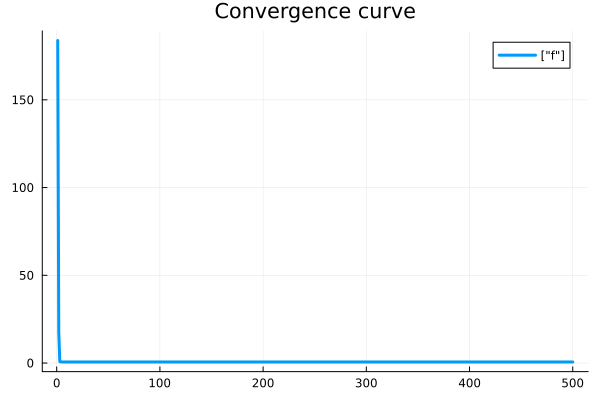

In [3]:
#Pkg.add("Plots")
using Plots

#Initialisation
x = zeros(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo =[];# Suite des itérés f_{best}^k

lambda=1e-2;

pas=1;
itermax=500;

xp=x;



choix_pas = 1;
while i < itermax
    i = i + 1;
    # Insérer votre code

    if choix_pas == 1
        alpha = 1 / i;
    
    elseif choix_pas == 2
        alpha = 10^(-2) / (i^2);

    else
        alpha = 1
    end

    g = subgradf(xp,y,H,W,lambda)

    xp = xp - alpha*g

    if (fbest[1] >= evalf(xp,y,H,W,lambda)[1])
        fbest = evalf(xp,y,H,W,lambda)
        xbest = xp
    end
    # Fin insérer code
    
    # Stockage
    append!( histo, fbest)
end
#histo
#Affichage des courbes de convergence
#plotly();
iter=1:itermax;
plot(iter,histo,title="Convergence curve",label=["f"],lw=3)

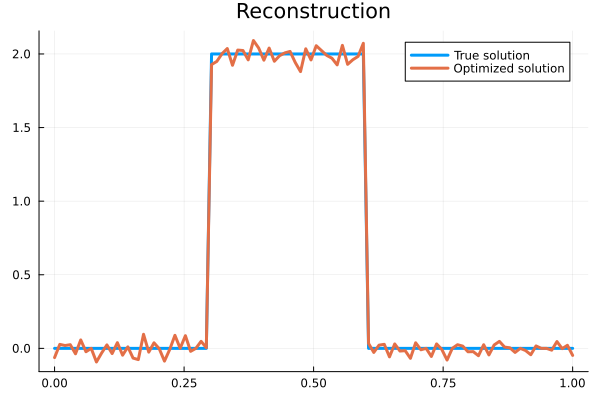

In [4]:
x=[xt,xbest];

plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

**Question 5 :** On pose $h(x)=\lambda \Vert x\Vert_1$ et $g(x)=\frac{1}{2}\Vert Hx-y\Vert_W^2$. Donner une expression analytique de la fonction proximale de h et implanter cette fonction. Implanter la fonction $g$ ainsi que son gradient.


In [5]:
""" Ma version 

# Evaluation de prox_h
function proxh(x,lambda) 
# Insérer votre code
    ret = zeros(length(x),1);
    for i in 1:length(x)
        if abs(x[i]) <= lambda
            ret[i] = 0
        else 
            if x[i] > lambda
                ret[i] = x[i] - lambda
            else
                ret[i] = x[i] + lambda
            end
        end
    end
    return ret
# Fin insérer code
end

#Evaluation de g
function evalg(x,y,H,W)
# Insérer votre code
    return (1/2)*matmul(matmul(transpose(matmul(H,x) - y),W),(matmul(H,x) - y))
# Fin insérer code
end    


#Evaluation du gradient de g
function gradg(x,y,H,W)
# Insérer votre code
    return matmul(matmul(transpose(H),W),(matmul(H,x) - y))
# Fin insérer code
end    
"""
"""
prox = proxh(x,lambda)
plot(x, prox)
"""


LoadError: cannot document the following expression:

"prox = proxh(x,lambda)\nplot(x, prox)\n"


In [11]:
# Fonctions d'Hicham

# Evaluation de prox_h
function proxh(x,lambda) 
    # Insérer votre code
        return sign.(x) .* max.(0, abs.(x) .- lambda)
    # Fin insérer code
    end
    
    #Evaluation de g
    function evalg(x,y,H,W)
        return 0.5*normW(H*x - y, W)
    end    
    
    
    #Evaluation du gradient de g
    function gradg(x,y,H,W)
    # Insérer votre code
        return 0.5*transpose(H)*W*(H*x - y)
    # Fin insérer code
    end    
    

gradg (generic function with 1 method)

In [12]:
# Fonctions d'Hicham

# Fonction évaluant f en x
function normW(x::Array, W::Matrix)
    norm = transpose(x) * W * x
    return norm[1]
end

function evalf(x,y,H,W,lambda) 
    # Insérer votre code
    return 0.5*normW(H*x - y, W) + lambda*norm(x, 1)
    # Fin insérer code
end


# Fonction évaluant un sous-gradient de f en x
function subgradf(x,y,H,W,lambda) 
    # Insérer votre code
    return 0.5*transpose(H)*W*(H*x - y) + lambda*sign.(x)
    # Fin insérer code
end

subgradf (generic function with 1 method)

**Question 6 :** Résoudre le problème par la méthode du gradient proximal avec recherche linéaire pour le pas. Vous implanterez en prémabule la fonction de recherche linéaire.

In [7]:
# Fonction calculant le pas par recherche linéaire
# Insérer votre code
function eval_alpha(x0, alpha0, beta, grad_x0)
    G_alpha = (1/alpha0) * (x - alpha0 * proxh(x0, lambda));
    xp = x0;
    alphal = beta*alpha0;
    while (evalg(xp - alphal * G_alpha,y,H,W))[1] >= (evalg(xp,y,H,W) - alphal*transpose(G_alpha)*gradg(xp,y,H,W) .+ (alphal/2)*norm(G_alpha, 2)^2)[1]
        alphal = beta*alphal;
        G_alpha = (1/alphal) * (x - alphal * proxh(x0, lambda));
    end
    #s = (alphal, G_alpha);
    #return (alphal, G_alpha)
    return alphal
end
# Fin insérer code

eval_alpha (generic function with 1 method)

In [13]:
# La fonction que j'ai implémentée ne fonctionnant pas,
# j'ai récupéré celle d'Hicham

# Fonction calculant le pas par recherche linéaire
# Insérer votre code


function backtracking_line_search(x, y, H, W, alpha, beta, lambda)
    alpha0=alpha
    Galpha = 1/alpha * (x - proxh(x - alpha * gradg(x, y, H, W), lambda))
    while evalg(x - alpha * gradg(x, y, H, W), y, H, W) > evalg(x, y, H, W) + alpha * dot(transpose(Galpha), gradg(x, y, H, W)) + alpha/2 * norm(Galpha, 2)^2
        alpha *= beta
        Galpha = 1/(alpha) * (x - proxh(x - alpha * gradg(x, y, H, W), lambda))
    end
    return alpha
end

# Fin insérer code

backtracking_line_search (generic function with 1 method)

In [9]:
#Initialisation
x = zeros(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo =[];# Suite des itérés f_{best}^k 

lambda0=100;
itermax=500;
beta=0.5;

xp=x;




alphal = 100;
grad_x0 = gradg(xp,y,H,W);

while i < itermax
    alphal = 100;
    i = i + 1;






    # Insérer votre code
   


    """
    if choix_pas == 1
        alpha = 1 / i;
    
    elseif choix_pas == 2
        alpha = 10^(-2) / (i^2);

    else
        alpha = 1
    end
    """
    d = eval_alpha(xp, alphal, beta, grad_x0)

    #xp = xp - alphal*G_alpha
    xp = xp - d

    if (fbest[1] >= evalf(xp,y,H,W,lambda)[1])
        fbest = evalf(xp,y,H,W,lambda)
        xbest = xp
    end





    # Fin insérer code
    





    
    # Stockage
    append!( histo, fbest)
end
#histo
#Affichage des courbes de convergence
plotly();
iter=1:itermax;
plot(iter,histo,title="Convergence curve",label=["f"],lw=3)

LoadError: UndefVarError: `gradg` not defined

In [14]:
# De même, le script ci-dessous est celui d'Hicham

#Initialisation
x = zeros(n,1);
xbest=x;
i = 0;
gbest =1000000; # $f_{best}^0$
histo =[];# Suite des itérés f_{best}^k 

lambda0=300;
itermax=500;
beta=0.5;

xp=x;

function evalh(x,lambda)
    return lambda*norm(x,1)
end
pas = backtracking_line_search(xp, y, H, W, 0.5, 0.8, lambda)
while i < itermax
    pas = backtracking_line_search(xp, y, H, W, 0.5, 0.8, lambda)
    i = i + 1;
    xp = proxh((xp .- pas*gradg(xp,y,H,W)),lambda)
    # Fin insérer code
    
    g = evalg(xp,y,H,W);

    if g < gbest
        gbest = g;
        xbest = xp;
    end
    # Stockage
    append!( histo, gbest)
end
#histo
#Affichage des courbes de convergence
plotly();
iter=1:itermax;
plot(iter,histo,title="Convergence curve",label=["g"],lw=3)

In [15]:
x=[xt,xbest];

plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

**Question 7 :** Evaluez la sensisibilité de l'algorithme aux différents paramètres : $\lambda_0$, $\beta$, itermax.  